In [1]:
# general
from datetime import datetime
from dotenv import load_dotenv, find_dotenv
import os

# custom local libs
from function import baseball_lambda

/Users/rosclay/Documents/VSCode/langgraph-multi-agent/venv/lib/python3.10/site-packages/langchain_core/_api/beta_decorator.py:87: LangChainBetaWarning: The function `bind_tools` is in beta. It is actively being worked on, so the API may change.
  warn_beta(
Python REPL can execute arbitrary code. Use with caution.


In [2]:
# read local .env file
_ = load_dotenv(find_dotenv()) 

In [3]:
# set Langsmith project
today = datetime.now().strftime("%Y%m%d")
os.environ["LANGCHAIN_PROJECT"] = f"Baseball Strikeouts - {today}"

In [4]:
session_id = '00787'

In [5]:
task = '''Plot the cumulative sum of strikeouts thrown by Danny Duffy in the 2018 season.'''
result = baseball_lambda.execute_workflow(task, session_id)
print(result)

{'Orchestrate': {'next': 'Retrieve'}}
----
Distance to neareast plan: 0.7424236536026001
{'Retrieve': {'next': 'Initialize', 'nearest_plan': '1. Import the schedule_and_record function from pybaseball:\n\n```python\nfrom pybaseball import schedule_and_record\n```\n\n2. Get the 2022 schedule and results for the Tampa Bay Rays:\n\n```python\nrays_2022 = schedule_and_record(2022, \'TB\')\n```\n\n3. Filter the dataframe to games where the Rays won (W/L == \'W\') or had a walk-off win (W/L == \'W-wo\'):\n\n```python\nrays_wins = rays_2022[(rays_2022[\'W/L\'] == \'W\') | (rays_2022[\'W/L\'] == \'W-wo\')]\n```\n\n4. Count the number of rows (games won) in the filtered dataframe:\n\n```python\nnum_wins = len(rays_wins)\nprint(f"The Tampa Bay Rays won {num_wins} games in 2022.")\n```', 'nearest_task': 'How many games did the Rays win in 2022?', 'nearest_code': '# 1. Import the schedule_and_record function from pybaseball\nfrom pybaseball import schedule_and_record\n# 2. Get the 2022 schedule an

In [6]:
task = '''label the x-axis with "game date" and the y-axis with "total k's"'''
result = baseball_lambda.execute_workflow(task, session_id)
print(result)

{'Orchestrate': {'next': 'Revise'}}
----
{'Revise': {'messages': [HumanMessage(content='Plot the cumulative sum of strikeouts thrown by Danny Duffy in the 2018 season.', name='User'), AIMessage(content="1. Import the playerid_lookup and statcast_pitcher functions from pybaseball:\n\n```python\nfrom pybaseball import playerid_lookup, statcast_pitcher\n```\n\n2. Look up Danny Duffy's player ID:\n\n```python \nduffy_id = playerid_lookup('duffy', 'danny')\nduffy_id = duffy_id['key_mlbam'][0]\n```\n\n3. Get Danny Duffy's statcast pitching data for the 2018 season:\n\n```python\nduffy_2018 = statcast_pitcher('2018-03-29', '2018-10-01', duffy_id)\n```\n\n4. Sum the strikeouts per game:\n\n```python\nduffy_2018['strikeouts'] = duffy_2018['events'].str.contains('strikeout').astype(int)\nstrikeouts_by_game = duffy_2018.groupby('game_date')['strikeouts'].sum()\n```\n\n5. Calculate the cumulative sum of strikeouts:\n\n```python\nstrikeouts_by_game_cumsum = strikeouts_by_game.cumsum()\n```\n\n6. Pl

{'Orchestrate': {'next': 'Execute'}}
----
Executing: # Look up Danny Duffy's player ID
duffy_id = playerid_lookup('duffy', 'danny') 
duffy_id = duffy_id['key_mlbam'][0]
print(f"Danny Duffy's player ID is {duffy_id}")
Result: NameError("name 'playerid_lookup' is not defined")
Executing: # Check if pybaseball is imported
import pybaseball
Executing: from pybaseball import playerid_lookup, statcast_pitcher

# Look up Danny Duffy's player ID
duffy_id = playerid_lookup('duffy', 'danny')['key_mlbam'][0]

# Get Danny Duffy's statcast pitching data for the 2018 season
duffy_2018 = statcast_pitcher('2018-03-29', '2018-10-01', duffy_id)
print(f"Retrieved {len(duffy_2018)} rows of data for Danny Duffy's 2018 season")
Result: Gathering player lookup table. This may take a moment.
Gathering Player Data
Retrieved 2785 rows of data for Danny Duffy's 2018 season

Executing: from pybaseball import playerid_lookup, statcast_pitcher

# Look up Danny Duffy's player ID
duffy_id = playerid_lookup('duffy', '

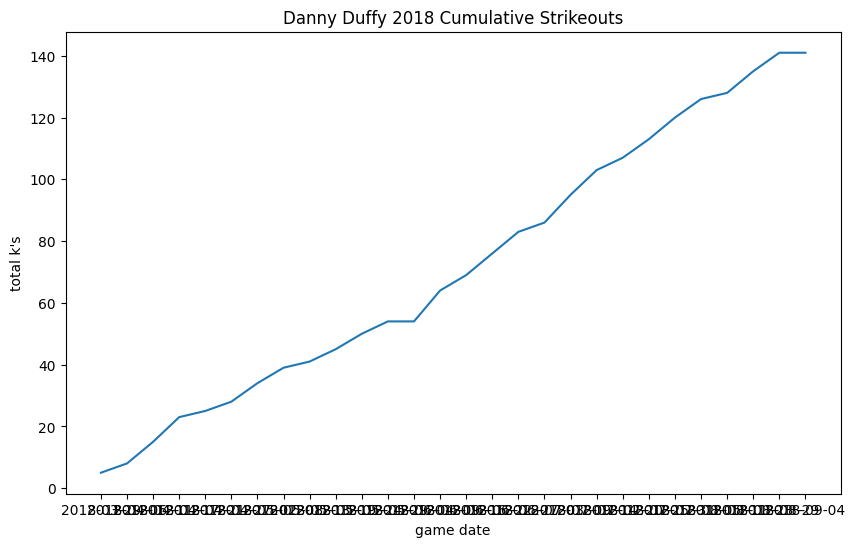

Result: Gathering Player Data

{'Execute': {'messages': [AIMessage(content='The cumulative sum of Danny Duffy\'s strikeouts in the 2018 season has been successfully plotted. The plot shows the total number of strikeouts increasing over the course of the season, with each point representing a game. The final cumulative strikeout total for the 2018 season can be seen at the end of the plot.\nHere is the code that was used to reach this solution:\n\n```python\n\n# Check if pybaseball is imported\nimport pybaseball\nfrom pybaseball import playerid_lookup, statcast_pitcher\n\n# Look up Danny Duffy\'s player ID\nduffy_id = playerid_lookup(\'duffy\', \'danny\')[\'key_mlbam\'][0]\n\n# Get Danny Duffy\'s statcast pitching data for the 2018 season\nduffy_2018 = statcast_pitcher(\'2018-03-29\', \'2018-10-01\', duffy_id)\nprint(f"Retrieved {len(duffy_2018)} rows of data for Danny Duffy\'s 2018 season")\nfrom pybaseball import playerid_lookup, statcast_pitcher\n\n# Look up Danny Duffy\'s player ID\

In [7]:
task = "approved"
result = baseball_lambda.execute_workflow(task, session_id)
print(result)

In [8]:
task = "yes"
result = baseball_lambda.execute_workflow(task, session_id)
print(result)

{'Orchestrate': {'next': 'Memorize'}}
----
{'Memorize': {'messages': [AIMessage(content='Thank you, task has been commited to memory')], 'previous_node': 'Memorize'}}
----
Thank you, task has been commited to memory
